<a href="https://colab.research.google.com/github/Camilob21/Ejercicios_En_Clase/blob/main/Talleres/Taller_Laplace/Taller_de_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER DE APLICACION LAPLACE

William Camilo Obando Cardenas

cc. 1085897389

#Punto 1

- El [péndulo elástico](https://en.wikipedia.org/wiki/Spring_pendulum) amortiguado es un ejemplo de un sistema mecánico que puede ser modelado por una ecuación diferencial ordinaria lineal (EDO) con coeficientes constantes.

- Desde el punto de vista de la teoría de señales y sistemas, puede ser interpretado como un sistema lineal invariante en el tiempo (SLIT).

- Las propiedades mecánicas del péndulo elástico amortiguado se analizan utilizando la teoría de los SLIT. La configuración mecánica subyacente se muestra en la siguiente figura:

![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

- Un cuerpo rígido de masa $m$ está montado sobre un resorte con rigidez $k$ que está conectado al suelo.

- Un amortiguador con un coeficiente de amortiguamiento $c$ se monta paralelo al resorte para modelar la fricción presente en el sistema.

- Se asume que el movimiento de la masa a lo largo del tiempo está restringido al eje vertical, aquí indicado por $y$. Además, se asume que la masa no se mueve para $ t <0 $.

- Denotando el desplazamiento de la masa con respecto al tiempo con $y(t)$, las condiciones iniciales se formulan como $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

- Se utilizarán los siguientes valores $m = 0.1$,  $c = 0.1$ y $k = 2.5$ para ilustrar de manera más sencilla el siguiente ejemplo.

Ecuación diferencial

La ecuación diferencia del sistema mecánico se obtiene al considerar el equilibrio de fuerzas ejercidas sobre la masa:

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

Donde $F_\text{E}(t) $ denota una fuerza externa que actúa sobre la masa. La fuerza $F_\text{S}(t)$ inducida por el resorte está dada por la [ley de Hooke](https://en.wikipedia.org/wiki/Hooke%27s_law)

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Es común modelar la fuerza de fricción $F_\text{F}(t)$ inducida por el amortiguador de manera proporcional a la velocidad de la masa

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

La fuerza inercial $F_\text{I}(t)$ debida a la aceleración de la masa se da como

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Al introducir las fuerzas anteriormente halladas en el equilibrio de fuerzas se obtiene la ecuación diferencial que describe el desplazamiento del péndulo elástico amortiguado

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Como consecuencia de la fuerza externa.

La ecuación anterior constituye una EDO con coeficientes constantes. Puede interpretarse como un SLTI con la fuerza externa $x(t)=F_\text{E}(t)$ como señal de entrada y el desplazamiento de la masa como la señal de salida $y(t)$.

Comparación con la red eléctrica

Comparando las EDO del péndulo elástico amortiguado y el circuito RLC, se tiene que ambos constituyen una EDO de segundo orden con coeficientes constantes.

La división de la EDO del circuito por la constante $C$ resulta en:

\begin{equation}
L \frac{d^2 u_\text{o}(t)}{dt^2} + R \frac{d u_\text{o}(t)}{dt} + \frac{1}{C} u_\text{o}(t) = \frac{1}{C} u_\text{i}(t)
\end{equation}

Donde $u_\text{i}(t)$ y $u_\text{o}(t)$ denotan el voltaje de entrada y salida del circuito respesctivamente.

La comparación de la EDO anterior con la del péndulo elástico amortiguado produce [equivalencia entre sistemas](https://en.wikipedia.org/wiki/System_equivalence) así:

|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
| Señal de entrada $x(t)$ | $u_\text{i}(t) = F_\text{E}(t) C$  | $F_\text{E}(t) = \frac{u_\text{i}(t)}{C}$ |
| Señal de salida $y(t)$  | $u_\text{o}(t)$                    | $y(t)$                                    |
|                         | $L=m$                              | $m=L$                                     |
|                         | $R=c$                              | $c=R$                                     |
|                         | $C=\frac{1}{k}$                    | $k=\frac{1}{C}$                           |

Respuesta al Impulso

El SLIT correspondiente al péndulo puede ser caracterizado por su respuesta al impulso $h(t)$. Se define como la salida del sistema ante una entra $x(t) = \delta(t)$ en la entrada. La respuesta al impulso caracteriza el movimiento $y(t)$ de la masa ante un evento.

Primero, se define la EDO del péndulo elástico amortiguado con `SymPy`

In [132]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

Se guardan los valores de las constantes en un diccionario para posteriores sustituciones

In [133]:
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
mck

{c: 1/10, k: 5/2, m: 0.1}

La respuesta al impulso se calcula al resolver la EDO

In [134]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                         ⎛        ____________⎞    ↪
             ⎛        ____________⎞          ⎛       ____________⎞       ⎜       ╱  2         ⎟    ↪
             ⎜       ╱  2         ⎟          ⎜      ╱  2         ⎟     t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠    ↪
           t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠       -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠     ────────────────────────    ↪
           ────────────────────────       ─────────────────────────              2⋅m               ↪
                     2⋅m                             2⋅m              ℯ                        ⋅θ( ↪
h(t) = C₁⋅ℯ                         + C₂⋅ℯ                          + ──────────────────────────── ↪
                                                                                ____________       ↪
                                                                               ╱  2                ↪
                                                                             ╲╱  c  - 4⋅k⋅m

Las constantes de integración $C_1$ y $C_2$ se determinan a partir de las condiciones iniciales $y(t) = 0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

In [135]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior, produce la respuesta al impulso del sistema mecánico

In [136]:
h = solution_h.subs(integration_constants)
h

          ⎛        ____________⎞            ⎛       ____________⎞      
          ⎜       ╱  2         ⎟            ⎜      ╱  2         ⎟      
        t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠         -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠      
        ────────────────────────         ─────────────────────────     
                  2⋅m                               2⋅m                
       ℯ                        ⋅θ(t)   ℯ                         ⋅θ(t)
h(t) = ────────────────────────────── - ───────────────────────────────
                 ____________                      ____________        
                ╱  2                              ╱  2                 
              ╲╱  c  - 4⋅k⋅m                    ╲╱  c  - 4⋅k⋅m         

Se grafica la respuesta para los valores de $m$, $c$ y $k$ definidas anteriormente

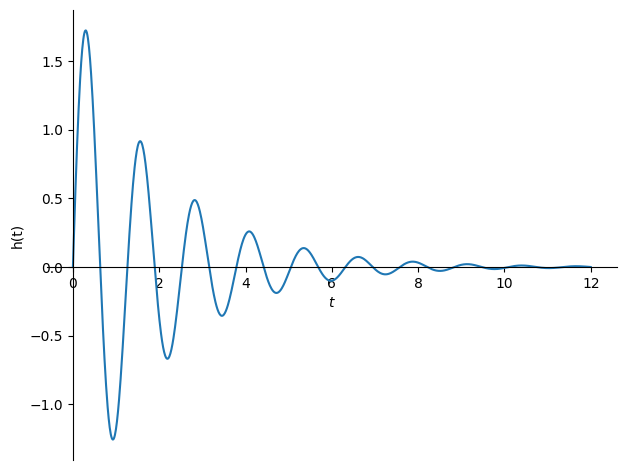

In [137]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

 Función de Transferencia

Para una señal exponencial de entrada $x(t)=e^{st}$, la función de transferencia $H(s)$ representa el peso de la entrada, tal que $y(t) = H(s) \cdot e^{s t}$. La función de transferencia se obtiene al introducir $x(t)$ y $y(t)$ en la EDO y resolver para $H(s)$

In [138]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

Las características de transferencia de un SLIT para señales exponenciales armónicas $e^{j\omega}=\cos(\omega t)+j\sin(\omega t)$ son de especial interés en el análisis de sistemas resonantes.

Se pueden derivar de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$. La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica.

In [139]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

       1        
────────────────
               2
ⅈ⋅c⋅ω + k - m⋅ω 

La magnitud de la función de transferencia $|H(j\omega)|$ se grafica para los valores de los parámetros dados anteriormente

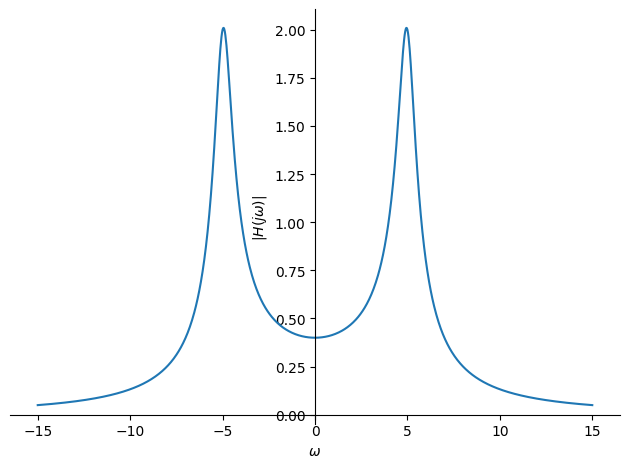

In [140]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Al inspeccionar la magnitud de la función de transferencia, se hace evidente que el péndulo del resorte amortiguado muestra resonancias (picos máximos) para dos frecuencias angulares específicas. Estas frecuencias de resonancia $\omega_0$ se calculan desde los valores extremos de $|H(j\omega)|$. Primero se calcula la derivada de $|H(j\omega)|$ con respecto a $\omega$ y luego se igual a cero

In [141]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

⎡         ____________        ____________⎤
⎢        ╱    2              ╱    2       ⎥
⎢       ╱    c              ╱    c        ⎥
⎢   -  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢    ╲╱      2           ╲╱      2        ⎥
⎢0, ───────────────────, ─────────────────⎥
⎣            m                   m        ⎦

Para los máximos de la función de transferencia solo es de interés el segundo y el tercer extremo

In [142]:
w0 = extrema[1:3]
w0

⎡      ____________        ____________⎤
⎢     ╱    2              ╱    2       ⎥
⎢    ╱    c              ╱    c        ⎥
⎢-  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢ ╲╱      2           ╲╱      2        ⎥
⎢───────────────────, ─────────────────⎥
⎣         m                   m        ⎦

Las frecuencias de resonancia se calculan para los valores de $m$, $c$ y $k$ dados anteriormente

In [143]:
[w00.subs(mck) for w00 in w0]

[-4.94974746830583, 4.94974746830583]

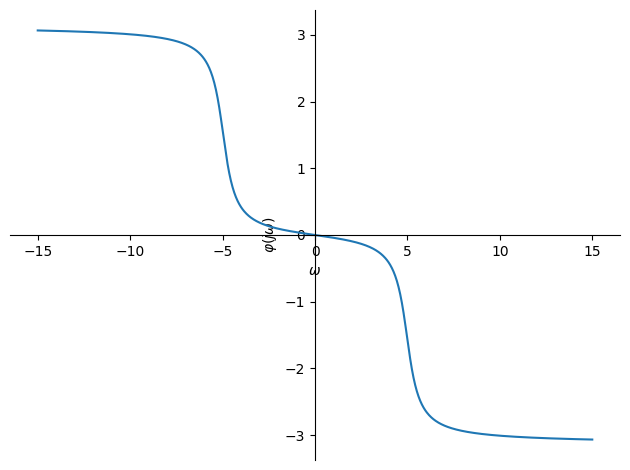

In [144]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

#Punto 2 y 3
Calculos a mano, en imagen adjunta en Github

## Solución de SLIT segundo orden forma canónica utilizando transformada de Laplace en Sympy
Aplicación de fracciones parciales

In [145]:
!pip install sympy
from scipy.signal import lti, step

In [146]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t, c, m, k = sym.symbols('t c m k', positive=True, real=True)
inv_k = 1 / k  # Definir 1/k como una expresión simbólica

In [147]:
#Entrada de interés en Laplace
X = 1/s
 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
# MODIFICAR PARA CADA CASO: IMPULS, ESCALON Y RAMPA

In [148]:
K = 1 #ganancia estática
wn = sym.sqrt(k*m) #frecuencia natural no amortiguada
xi = m/(2*c*sym.sqrt(m/k)) #factor amortiguamiento
H = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2)) #función de transferencia en lazo cerrado slit 2 orden
#Hlc = H/(1+H) #para lazo cerrado
H

      k⋅m       
────────────────
       2   k⋅m⋅s
k⋅m + s  + ─────
             c  

In [149]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                 __________      
                ╱     k⋅m     k⋅m
1.0⋅ⅈ⋅√k⋅√m⋅   ╱  1 - ────  - ───
              ╱          2    2⋅c
            ╲╱        4⋅c        

In [150]:
#Frecuencia Natrural Amortiguada
wd = wn*sym.sqrt(1-xi**2)
wd

           __________
          ╱     k⋅m  
√k⋅√m⋅   ╱  1 - ──── 
        ╱          2 
      ╲╱        4⋅c  

In [151]:
#Tiempo pico tp
tp = sym.pi/(wn*sym.sqrt(1-(xi**2)))
tp

          π          
─────────────────────
           __________
          ╱     k⋅m  
√k⋅√m⋅   ╱  1 - ──── 
        ╱          2 
      ╲╱        4⋅c  

In [152]:
#Tiempo establecimiento
ts = 3/(xi*wn)
ts

6⋅c
───
k⋅m

In [153]:
def tiempo_levantamiento(wn, xi):
    """
    Calcula el tiempo de levantamiento (10%-90%) para un sistema de segundo orden
    con frecuencia natural wn y factor de amortiguamiento xi.
    """
    xi = float(xi)  # Convertir a número flotante para evitar problemas con SymPy

    if xi < 1:  # Sistema Subamortiguado
        wd = wn * np.sqrt(1 - xi**2)
        theta = np.arctan(np.sqrt(1 - xi**2) / xi)
        tr = (np.pi - theta) / wd

    elif xi > 1:  # Sistema Sobreamortiguado
        tr = 2.2 / (wn * (xi - np.sqrt(xi**2 - 1)))

    else:  # Sistema Críticamente Amortiguado (xi = 1)
        tr = 2.2 / wn

    return tr


##Sistema Sub Amortiguado
$0<\xi< 1$: SLIT subamortiguado.

In [154]:
#evaluar valores RLC
mkc = {c: 1, m: 1, k: 1}#valores utilizados para la simulación
xi.subs(mkc) #Mostrar valor del factor de amortiguamiento para cer si cumple

1/2

In [155]:
H.subs(mkc)

    1     
──────────
 2        
s  + s + 1

In [156]:
print('p1=',p1.subs(mkc))
print('p2=',p2.subs(mkc))
print('xi=',xi.subs(mkc))
print('omega_n=',wn.subs(mkc))

p1= -1/2 + 0.5*sqrt(3)*I
p2= -1/2 - 0.5*sqrt(3)*I
xi= 1/2
omega_n= 1


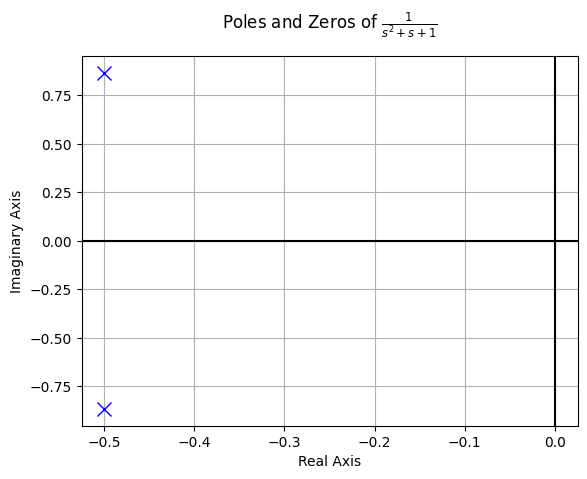

In [157]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

num,den=sym.fraction(H.subs(mkc))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de mkc
pole_zero_plot(tf1)

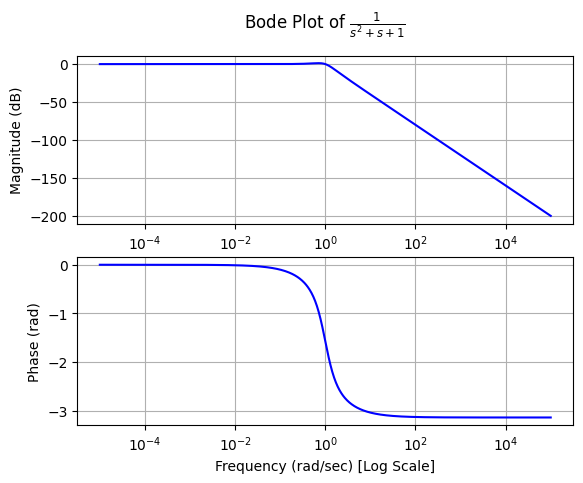

In [158]:
import sympy.physics.control as control
#Diagrma de Bode
control.bode_plot(tf1)

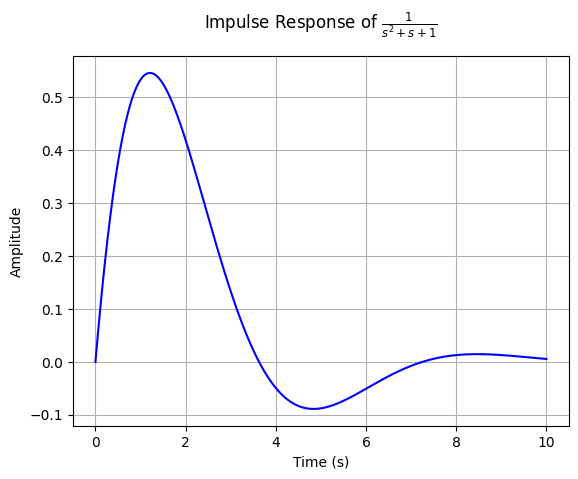

In [159]:
#Respuesta al Impulso
control.impulse_response_plot(tf1)

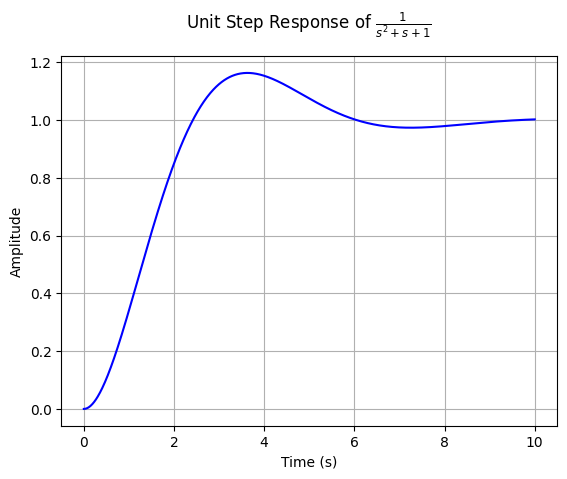

In [160]:
#Respuesta al Escalon
control.step_response_plot(tf1)

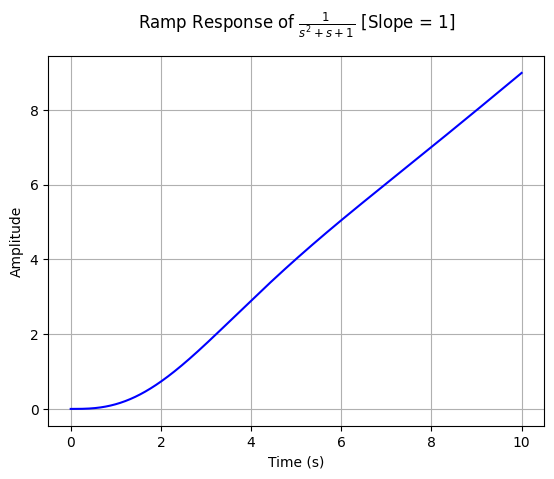

In [161]:
#Respuesta a la rampa
control.ramp_response_plot(tf1)

In [162]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

        k⋅m         
────────────────────
  ⎛       2   k⋅m⋅s⎞
s⋅⎜k⋅m + s  + ─────⎟
  ⎝             c  ⎠

In [163]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp


       c⋅s + k⋅m         1
- ──────────────────── + ─
             2           s
  c⋅k⋅m + c⋅s  + k⋅m⋅s    

In [164]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

         -k⋅m⋅t     ⎛           ____________⎞                                            
         ───────    ⎜          ╱    2       ⎟                                            
           2⋅c      ⎜√k⋅√m⋅t⋅╲╱  4⋅c  - k⋅m ⎟        -k⋅m⋅t     ⎛           ____________⎞
  √k⋅√m⋅ℯ       ⋅sin⎜───────────────────────⎟        ───────    ⎜          ╱    2       ⎟
                    ⎝          2⋅c          ⎠          2⋅c      ⎜√k⋅√m⋅t⋅╲╱  4⋅c  - k⋅m ⎟
- ─────────────────────────────────────────── + 1 - ℯ       ⋅cos⎜───────────────────────⎟
                   ____________                                 ⎝          2⋅c          ⎠
                  ╱    2                                                                 
                ╲╱  4⋅c  - k⋅m                                                           

In [165]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(mkc).apart(s)
Ye


    s + 1      1
- ────────── + ─
   2           s
  s  + s + 1    

In [166]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

        -t                            
        ───                           
         2     ⎛√3⋅t⎞    -t           
    √3⋅ℯ   ⋅sin⎜────⎟    ───          
               ⎝ 2  ⎠     2     ⎛√3⋅t⎞
1 - ───────────────── - ℯ   ⋅cos⎜────⎟
            3                   ⎝ 2  ⎠

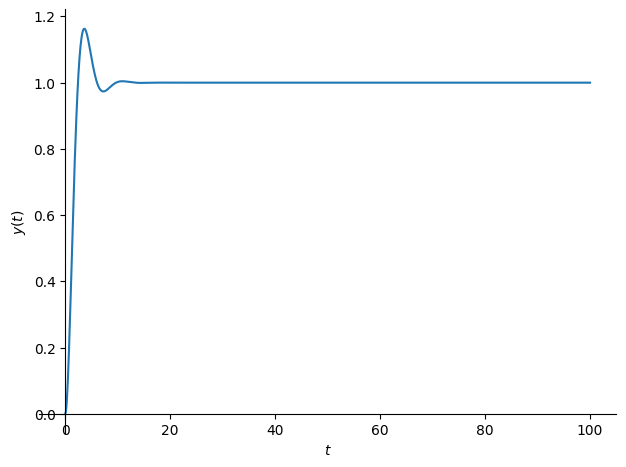

In [167]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((50/xi*wn).subs(mkc))),xlabel='$t$', ylabel='$y(t)$')
plt.show()


In [168]:
#Frecuencia  no Amortiguada
wn.subs(mkc)

1

In [169]:
#Frecuencia Amortiguada
wd.subs(mkc)

√3
──
2 

In [170]:
#Tiempo de levantamiento
z=xi.subs(mkc)
tr=tiempo_levantamiento(wn, z)
tr.subs(mkc)

2.41839915231229

In [171]:
#Tiempo Pico
tp.subs(mkc)

2⋅√3⋅π
──────
  3   

In [172]:
#Tiempo establecimiento
ts.subs(mkc)

6

##Sistema Sobre amortiguado
$\xi > 1$: SLIT sobreamortiguado

In [173]:
#evaluar valores RLC
mkc = {c: 1, m: 6, k: 1}#valores utilizados para la simulación
xi.subs(mkc) #Mostrar valor del factor de amortiguamiento para cer si cumple

√6
──
2 

In [174]:
H.subs(mkc)

     6      
────────────
 2          
s  + 6⋅s + 6

In [175]:
print('p1=',p1.subs(mkc))
print('p2=',p2.subs(mkc))
print('xi=',xi.subs(mkc))
print('omega_n=',wn.subs(mkc))

p1= -3 - 1.0*sqrt(3)
p2= -3 + 1.0*sqrt(3)
xi= sqrt(6)/2
omega_n= sqrt(6)


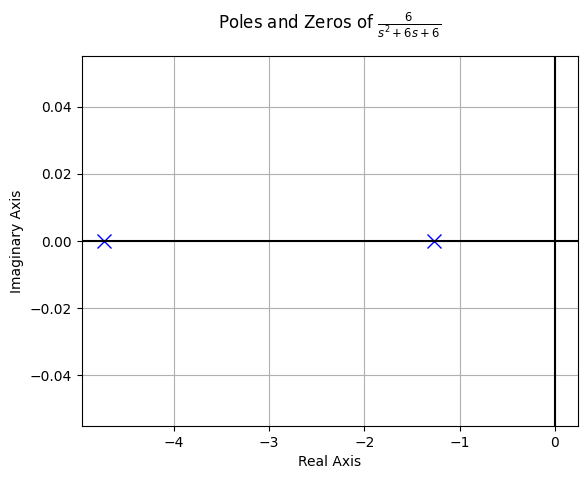

In [176]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(mkc))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de mkc
pole_zero_plot(tf1)

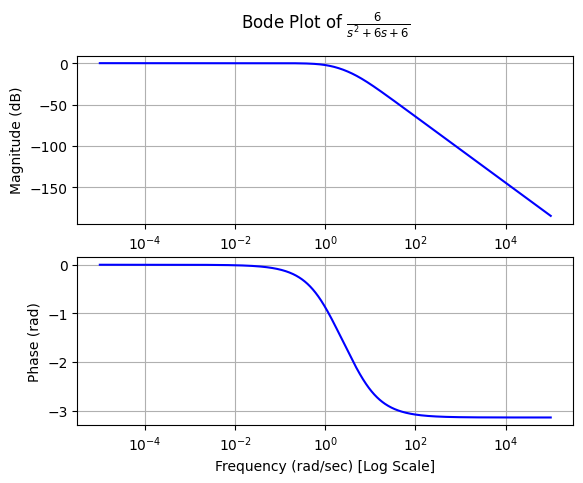

In [177]:
#Diagrma de Bode
control.bode_plot(tf1)

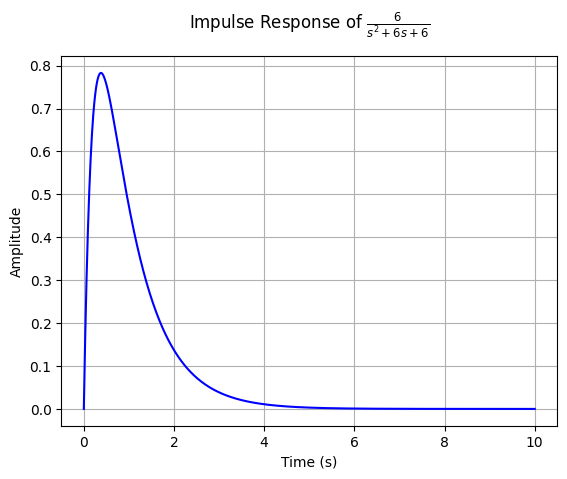

In [178]:
#Respuesta al Impulso
control.impulse_response_plot(tf1)


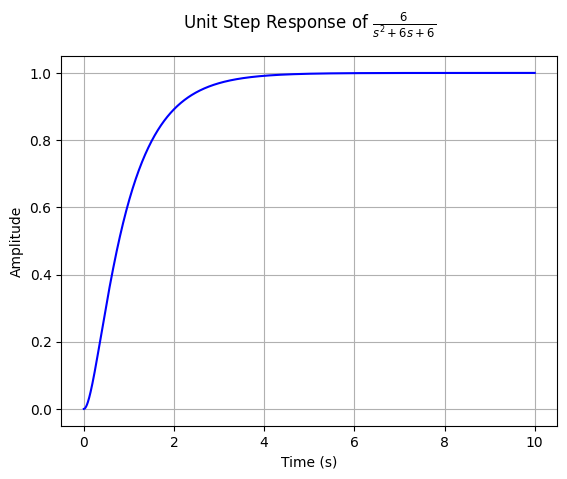

In [179]:
#Respuesta al Escalon
control.step_response_plot(tf1)


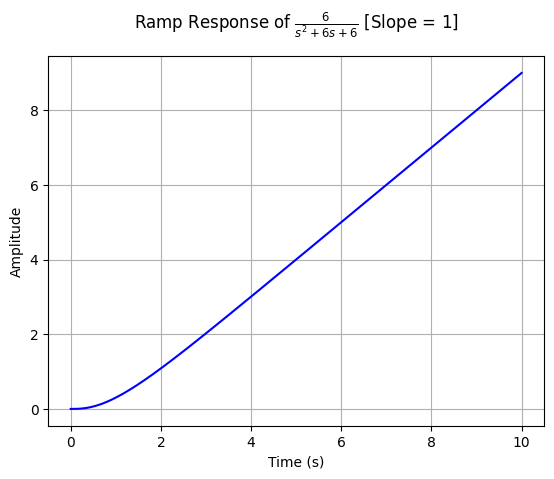

In [180]:
#Respuesta a la rampa
control.ramp_response_plot(tf1)

In [181]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

        k⋅m         
────────────────────
  ⎛       2   k⋅m⋅s⎞
s⋅⎜k⋅m + s  + ─────⎟
  ⎝             c  ⎠

In [182]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

       c⋅s + k⋅m         1
- ──────────────────── + ─
             2           s
  c⋅k⋅m + c⋅s  + k⋅m⋅s    

In [183]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

         -k⋅m⋅t     ⎛           ____________⎞                                            
         ───────    ⎜          ╱    2       ⎟                                            
           2⋅c      ⎜√k⋅√m⋅t⋅╲╱  4⋅c  - k⋅m ⎟        -k⋅m⋅t     ⎛           ____________⎞
  √k⋅√m⋅ℯ       ⋅sin⎜───────────────────────⎟        ───────    ⎜          ╱    2       ⎟
                    ⎝          2⋅c          ⎠          2⋅c      ⎜√k⋅√m⋅t⋅╲╱  4⋅c  - k⋅m ⎟
- ─────────────────────────────────────────── + 1 - ℯ       ⋅cos⎜───────────────────────⎟
                   ____________                                 ⎝          2⋅c          ⎠
                  ╱    2                                                                 
                ╲╱  4⋅c  - k⋅m                                                           

In [184]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(mkc).apart(s)
Ye

     s + 6       1
- ──────────── + ─
   2             s
  s  + 6⋅s + 6    

In [185]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

        -3⋅t               -3⋅t           
1 - √3⋅ℯ    ⋅sinh(√3⋅t) - ℯ    ⋅cosh(√3⋅t)

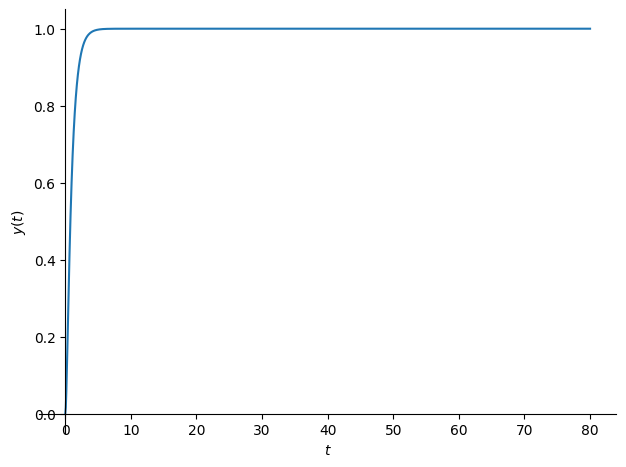

In [186]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((40/xi*wn).subs(mkc))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

In [187]:
#Frecuencia  no Amortiguada
wn.subs(mkc)

√6

In [188]:
#Frecuencia Amortiguada
wd.subs(mkc)

√3⋅ⅈ

In [189]:
#Tiempo de levantamiento
z=xi.subs(mkc)
tr=tiempo_levantamiento(wn, z)
tr.subs(mkc)

0.708345605945317⋅√6

In [190]:
#Tiempo Pico
tp.subs(mkc)


-√3⋅ⅈ⋅π 
────────
   3    

In [191]:
#Tiempo establecimiento
ts.subs(mkc)

1

##Amortiguamiento critico
$\xi = 1$: SLIT con amortiguamiento crítico.

In [192]:
#evaluar valores RLC
mkc = {c: 1, m: 4, k: 1}#valores utilizados para la simulación
xi.subs(mkc) #Mostrar valor del factor de amortiguamiento para cer si cumple


1

In [193]:
H.subs(mkc)

     4      
────────────
 2          
s  + 4⋅s + 4

In [194]:
print('p1=',p1.subs(mkc))
print('p2=',p2.subs(mkc))
print('xi=',xi.subs(mkc))
print('omega_n=',wn.subs(mkc))

p1= -2
p2= -2
xi= 1
omega_n= 2


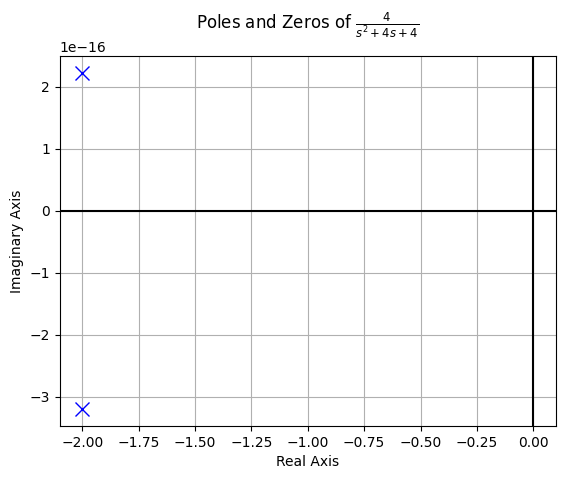

In [195]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(mkc))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de mkc
pole_zero_plot(tf1)

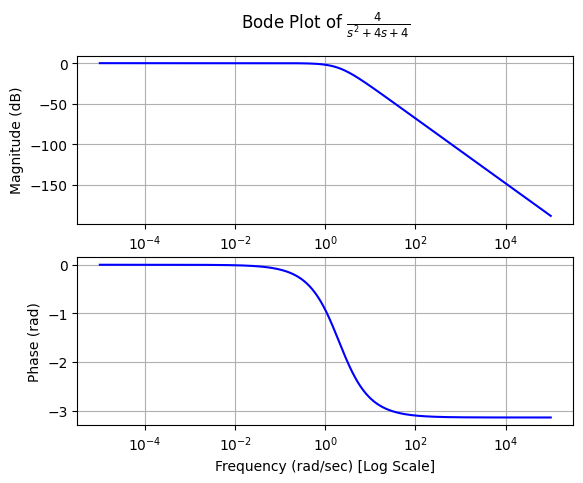

In [196]:
#Diagrma de Bode
control.bode_plot(tf1)

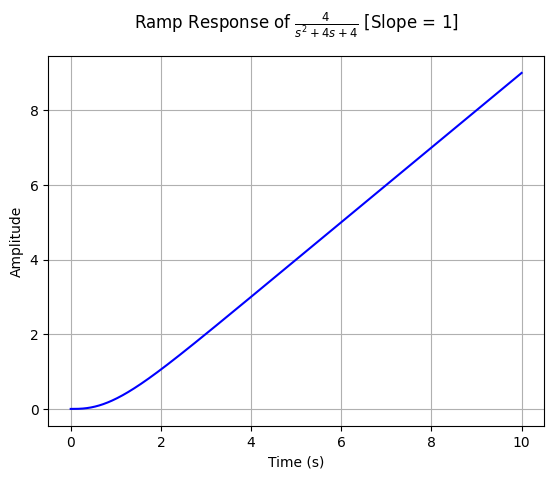

In [197]:
#Respuesta a la rampa
control.ramp_response_plot(tf1)

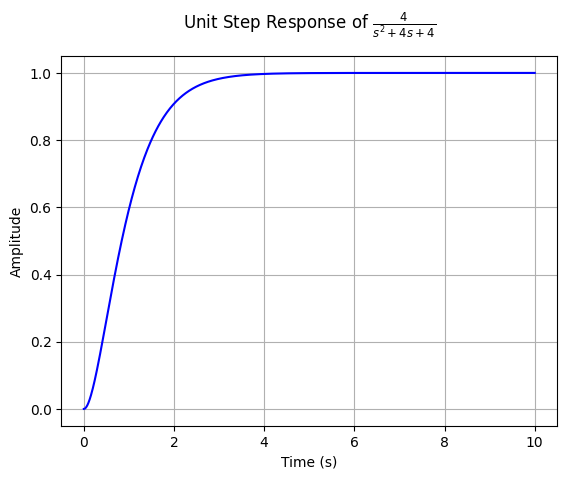

In [198]:
#Respuesta al Escalon
control.step_response_plot(tf1)

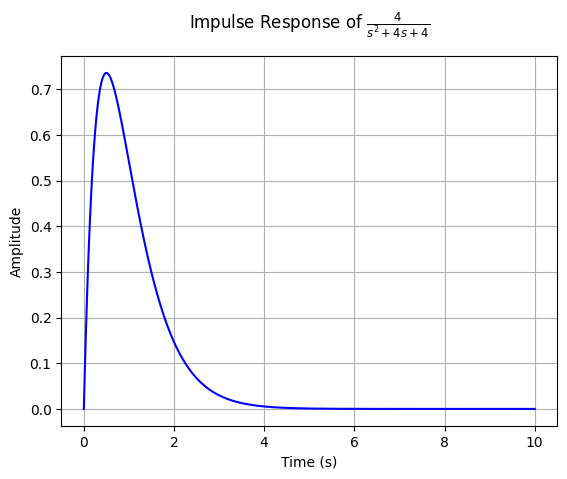

In [199]:
#Respuesta al Impulso
control.impulse_response_plot(tf1)

In [200]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

        k⋅m         
────────────────────
  ⎛       2   k⋅m⋅s⎞
s⋅⎜k⋅m + s  + ─────⎟
  ⎝             c  ⎠

In [201]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

       c⋅s + k⋅m         1
- ──────────────────── + ─
             2           s
  c⋅k⋅m + c⋅s  + k⋅m⋅s    

In [202]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

         -k⋅m⋅t     ⎛           ____________⎞                                            
         ───────    ⎜          ╱    2       ⎟                                            
           2⋅c      ⎜√k⋅√m⋅t⋅╲╱  4⋅c  - k⋅m ⎟        -k⋅m⋅t     ⎛           ____________⎞
  √k⋅√m⋅ℯ       ⋅sin⎜───────────────────────⎟        ───────    ⎜          ╱    2       ⎟
                    ⎝          2⋅c          ⎠          2⋅c      ⎜√k⋅√m⋅t⋅╲╱  4⋅c  - k⋅m ⎟
- ─────────────────────────────────────────── + 1 - ℯ       ⋅cos⎜───────────────────────⎟
                   ____________                                 ⎝          2⋅c          ⎠
                  ╱    2                                                                 
                ╲╱  4⋅c  - k⋅m                                                           

In [203]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(mkc).apart(s)
Ye

    1        2       1
- ───── - ──────── + ─
  s + 2          2   s
          (s + 2)     

In [204]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

       -2⋅t        -2⋅t
- 2⋅t⋅ℯ     + 1 - ℯ    

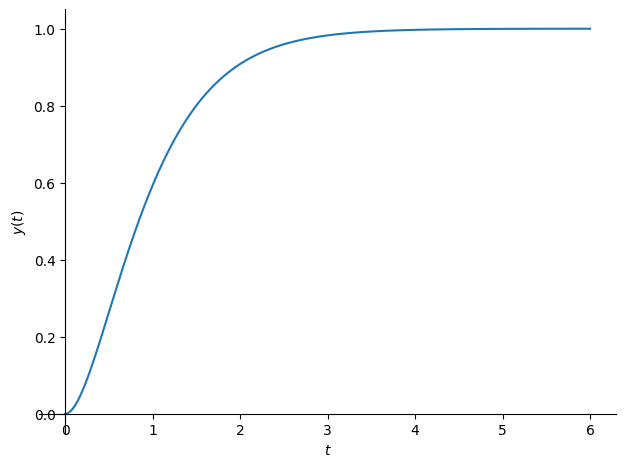

In [205]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((3/xi*wn).subs(mkc))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

In [206]:
#Frecuencia  no Amortiguada
wn.subs(mkc)

2

In [207]:
#Frecuencia Amortiguada
wd.subs(mkc)

0

In [208]:
#Tiempo de levantamiento
z=xi.subs(mkc)
tr=tiempo_levantamiento(wn, z)
tr.subs(mkc)


1.10000000000000

In [209]:
#Tiempo Pico
tp.subs(mkc)


zoo

In [210]:
#Tiempo establecimiento
ts.subs(mkc)

3/2